<a href="https://colab.research.google.com/github/ivangtorre/Curso_CRIDA_2022/blob/main/CRIDA_2022_Ejercicio_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## CIFAR-100 Classification using ALexNet


In [ ]:
# First install Pytorch
!pip install torch
!pip install torchvision

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn.functional as F



## CIFAR-100 Dataset
he CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).




In [ ]:
tranform_train = transforms.Compose([transforms.Resize((227,227)), transforms.RandomHorizontalFlip(p=0.7), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
tranform_test = transforms.Compose([transforms.Resize((227,227)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_data = datasets.CIFAR100(root = './data', train = True, transform = tranform_train, download = True)
test_data = datasets.CIFAR100(root = './data', train = False, transform = tranform_test)

Files already downloaded and verified


In [ ]:
# Define Hyperparameters
batch_size = 128 # the size of input data took for one iteration
num_classes = 100 # number of output classes discrete range [0,99] ** DO NOT MODIFY
num_epochs = 10 # number of times which the entire dataset is passed throughout the model
lr = 5e-4 # size of step 

In [ ]:
#Load the data
train_gen = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_gen = torch.utils.data.DataLoader(dataset = test_data, batch_size = batch_size, shuffle = False)

## Visualize the dataset
When we run the code, we will get the greyscale visualization of the MNIST images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cattle


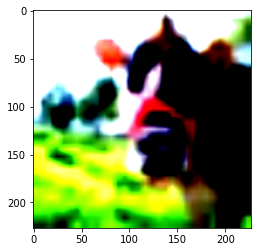

In [ ]:
classes = train_data.classes
image, label = train_data[0] # Visualize the data

print(classes[label])
plt.imshow(image.permute(1, 2, 0))


# ALEXNET
AlexNet is the name of a convolutional neural network (CNN) architecture, designed by Alex Krizhevsky in collaboration with Ilya Sutskever and Geoffrey Hinton, who was Krizhevsky's Ph.D. advisor.

AlexNet competed in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012.[3] The network achieved a top-5 error of 15.3%, more than 10.8 percentage points lower than that of the runner up. The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of graphics processing units (GPUs) during training



In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

On the following we can visualize the structure of the Deep Neural Network that we have just built.

In [ ]:
# Build the Model
net = AlexNet()
if torch.cuda.is_available():
  net.cuda()
print(net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

In [ ]:
#Define loss-function & optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

## Training the model
It is now time to train the model. During training all images will be input into the DNN during one epoch. The objetive is to minimize a loss function (Cross Entropy) between the output and the ground truth. The errors are backpropagated and the optimizer adjust the parameters of the DNN in order to search an optimal solution. Usually the more epochs we train, the better model we will get (although overfitting could happen)

In [ ]:
#Training the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr= lr) #Adam seems to be the most popular for deep learning

for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_ep = 0
    for batch_idx, (data, targets) in enumerate(train_gen):
        data = data.cuda()
        targets = targets.cuda()
        ## Forward Pass
        optimizer.zero_grad()
        scores = net(data)
        loss = criterion(scores,targets)
        loss.backward()
        optimizer.step()
        loss_ep += loss.item()
        print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, batch_idx+1, len(train_data)//batch_size, loss.data))


Epoch [1/10], Step [1/390], Loss: 6.9064
Epoch [1/10], Step [2/390], Loss: 6.6774
Epoch [1/10], Step [3/390], Loss: 12.9917
Epoch [1/10], Step [4/390], Loss: 5.5959
Epoch [1/10], Step [5/390], Loss: 6.2047
Epoch [1/10], Step [6/390], Loss: 6.3363
Epoch [1/10], Step [7/390], Loss: 6.2325
Epoch [1/10], Step [8/390], Loss: 5.8542
Epoch [1/10], Step [9/390], Loss: 5.2662
Epoch [1/10], Step [10/390], Loss: 4.9030
Epoch [1/10], Step [11/390], Loss: 5.1657
Epoch [1/10], Step [12/390], Loss: 5.3836
Epoch [1/10], Step [13/390], Loss: 5.0546
Epoch [1/10], Step [14/390], Loss: 4.8539
Epoch [1/10], Step [15/390], Loss: 4.8414
Epoch [1/10], Step [16/390], Loss: 4.6948
Epoch [1/10], Step [17/390], Loss: 4.7954
Epoch [1/10], Step [18/390], Loss: 4.7152
Epoch [1/10], Step [19/390], Loss: 4.7937
Epoch [1/10], Step [20/390], Loss: 4.7563
Epoch [1/10], Step [21/390], Loss: 4.7560
Epoch [1/10], Step [22/390], Loss: 4.7901
Epoch [1/10], Step [23/390], Loss: 4.7712
Epoch [1/10], Step [24/390], Loss: 4.6933


## While it is training here we have some lectures about the parameters of a CNN.



1.   Stride: https://deepai.org/machine-learning-glossary-and-terms/stride
2.   Padding: https://deepai.org/machine-learning-glossary-and-terms/padding

Some lectures about CNN:
https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network




## Evaluation of the model. 
The model has decreased the loss during the training, but Loss is not a very intuitive metric. We will first evaluate the metric on the training set.

In [ ]:
with torch.no_grad():
  num_correct = 0
  num_samples = 0
  for batch_idx, (data,targets) in enumerate(test_gen):
    data = data.cuda()
    targets = targets.cuda()
    ## Forward Pass
    scores = net(data)
    _, predictions = scores.max(1)
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)
print('Training Accuracy of the model: %.3f %%' %((100*num_correct)/(num_samples+1)))

Training Accuracy of the model: 42.986 %


## Now is your turn. Some things you can try:

*   Modify the batch size. The batch size is a number of samples processed before the model is updated. 
*   Modify the number of epochs. The number of epochs is the number of complete passes through the training dataset.
*   Modify the learning rate. The learning rate controls how quickly the model is adapted to the problem.



